In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("heartPredict").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 15:59:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/11 15:59:13 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [3]:
spark

In [13]:
# df = spark.read.csv('../Dataset/x_train.csv', header = True)
df = spark.read.option('header', 'true').csv('../Dataset/x_train.csv')

In [ ]:

# Show the DataFrame
df.show(1)

In [16]:
first_row = df.first()
print(first_row)

Row(_STATE='53', FMONTH='11', IDATE='11162015', IMONTH='11', IDAY='16', IYEAR='2015', DISPCODE='1100', SEQNO='2015015629', _PSU='2015015629', CTELENUM=None, PVTRESD1=None, COLGHOUS=None, STATERES=None, CELLFON3=None, LADULT=None, NUMADULT=None, NUMMEN=None, NUMWOMEN=None, CTELNUM1='1', CELLFON2='1', CADULT='2', PVTRESD2='1', CCLGHOUS=None, CSTATE='1', LANDLINE='1', HHADULT='2', GENHLTH='2', PHYSHLTH='1', MENTHLTH='5', POORHLTH='88', HLTHPLN1='1', PERSDOC2='1', MEDCOST='2', CHECKUP1='1', BPHIGH4='3', BPMEDS=None, BLOODCHO='1', CHOLCHK='1', TOLDHI2='2', CVDSTRK3='2', ASTHMA3='2', ASTHNOW=None, CHCSCNCR='2', CHCOCNCR='2', CHCCOPD1='2', HAVARTH3='2', ADDEPEV2='1', CHCKIDNY='2', DIABETE3='3', DIABAGE2=None, SEX='2', MARITAL='1', EDUCA='5', RENTHOM1='1', NUMHHOL2=None, NUMPHON2=None, CPDEMO1=None, VETERAN3='2', EMPLOY1='1', CHILDREN='88', INCOME2='8', INTERNET='1', WEIGHT2='110', HEIGHT3='501', PREGNANT=None, QLACTLM2='1', USEEQUIP='2', BLIND='2', DECIDE='2', DIFFWALK='2', DIFFDRES='2', DIFF

In [19]:
len(first_row)

321

In [22]:
df.select(df.columns[:10]).describe().show()

+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+--------+
|summary|            _STATE|            FMONTH|            IDATE|           IMONTH|              IDAY|             IYEAR|          DISPCODE|               SEQNO|                _PSU|CTELENUM|
+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+--------+
|  count|            328135|            328135|           328135|           328135|            328135|            328135|            328135|              328135|              328135|  188720|
|   mean|29.973651088728726| 6.360689959925031|6563638.198147104| 6.41666082557484|14.496234781416186|2015.0247581026101|1115.0148566900818|2.0150051973278103E9|2.0150051973278103E9|     1.0|
| stddev|16.031777303496714|3.4872625217

In [24]:
df.select(df.columns[10:20]).describe().show()

+-------+--------------------+--------+--------+------------------+-------------------+------------------+------------------+------------------+--------------------+--------------------+
|summary|            PVTRESD1|COLGHOUS|STATERES|          CELLFON3|             LADULT|          NUMADULT|            NUMMEN|          NUMWOMEN|            CTELNUM1|            CELLFON2|
+-------+--------------------+--------+--------+------------------+-------------------+------------------+------------------+------------------+--------------------+--------------------+
|  count|              188720|      32|  188719|            188720|                 32|            188702|            188611|            188610|              139415|              139415|
|   mean|   1.000169563374311|     1.0|     1.0|1.5446322594319628|            1.65625|1.7938866572691334|0.8015704280238162|0.9919357404167329|                 1.0|                 1.0|
| stddev|0.013020580667445623|     0.0|     0.0|0.498005296742212

In [29]:
df.printSchema()

root
 |-- _STATE: string (nullable = true)
 |-- FMONTH: string (nullable = true)
 |-- IDATE: string (nullable = true)
 |-- IMONTH: string (nullable = true)
 |-- IDAY: string (nullable = true)
 |-- IYEAR: string (nullable = true)
 |-- DISPCODE: string (nullable = true)
 |-- SEQNO: string (nullable = true)
 |-- _PSU: string (nullable = true)
 |-- CTELENUM: string (nullable = true)
 |-- PVTRESD1: string (nullable = true)
 |-- COLGHOUS: string (nullable = true)
 |-- STATERES: string (nullable = true)
 |-- CELLFON3: string (nullable = true)
 |-- LADULT: string (nullable = true)
 |-- NUMADULT: string (nullable = true)
 |-- NUMMEN: string (nullable = true)
 |-- NUMWOMEN: string (nullable = true)
 |-- CTELNUM1: string (nullable = true)
 |-- CELLFON2: string (nullable = true)
 |-- CADULT: string (nullable = true)
 |-- PVTRESD2: string (nullable = true)
 |-- CCLGHOUS: string (nullable = true)
 |-- CSTATE: string (nullable = true)
 |-- LANDLINE: string (nullable = true)
 |-- HHADULT: string (null

23/10/13 01:37:37 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2008992 ms exceeds timeout 120000 ms
23/10/13 01:37:37 WARN SparkContext: Killing executors is not supported by current scheduler.
23/10/13 01:37:38 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$

In [26]:
column_name = 'NUMADULT'
column_data = df.select(column_name).toPandas()

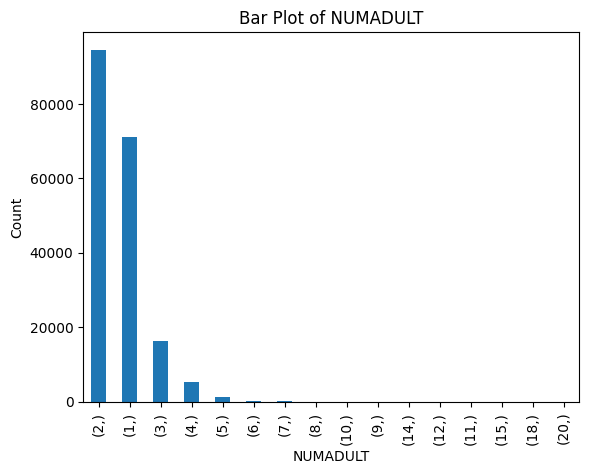

In [28]:
column_data.value_counts().plot(kind='bar')
plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(f"Bar Plot of {column_name}")
plt.show()